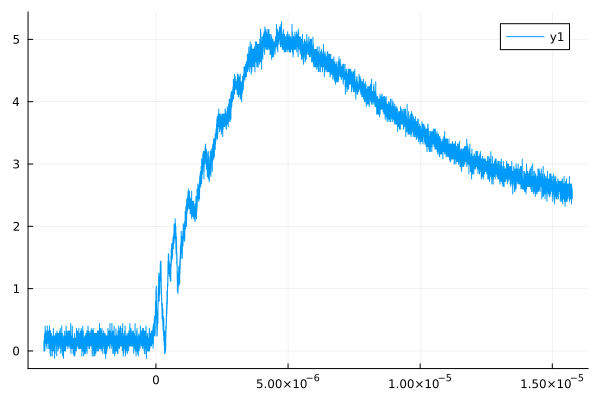

In [1]:
using Plots
using DataFrames
using CSV
using LsqFit

dt = CSV.read("data/D05AB_SC90.CSV", DataFrame)
plot(dt.Time, dt.Volt)

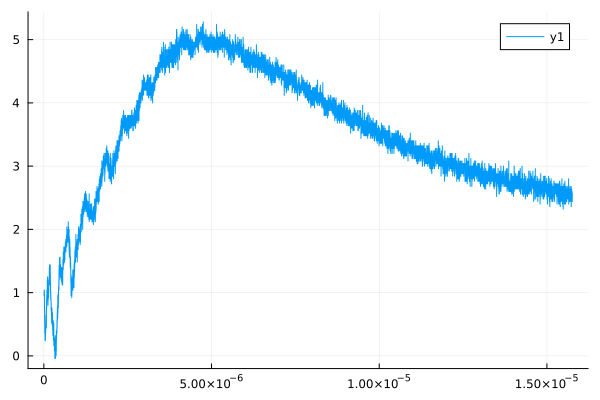

In [2]:
dt1 = dt[dt.Time.>0,:]
plot(dt1.Time, dt1.Volt)

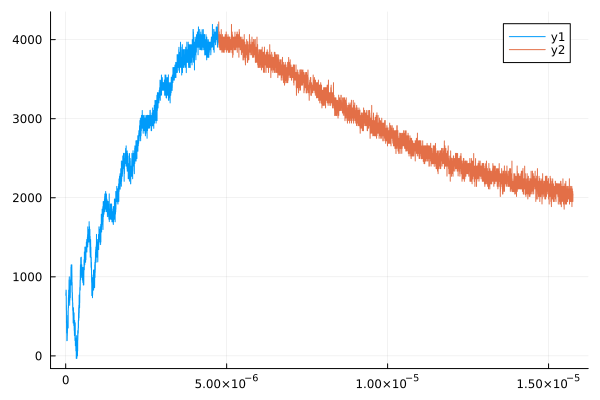

In [3]:
t1 = dt1[dt1.Volt.>=maximum(dt1.Volt), :]
dt2 = dt1[dt1.Time.< t1.Time, :]
plot(dt2.Time, dt2.Volt*800)
dt3 = dt1[dt1.Time.>= t1.Time, :]
plot!(dt3.Time, dt3.Volt*800)



Fitted Parameters1: [5203.910288881382, 2.99449857810873e-6]


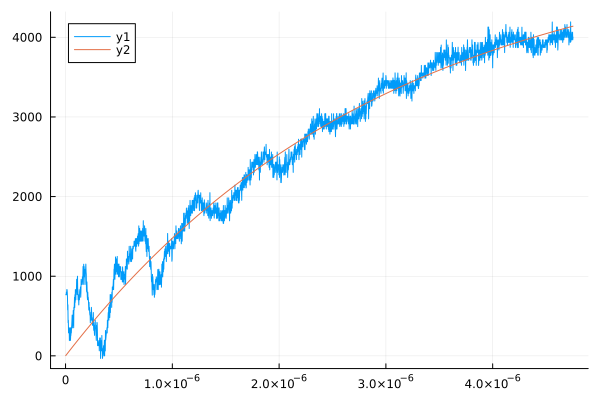

In [4]:
model1(x, p) = @. p[1] * (1 - exp(-(x /p[2])))
# 初期パラメータの推測
initial_params1 = [5300,4e-6]

# フィッティングの実行
fit_result1 = curve_fit(model1, dt2.Time, dt2.Volt*800, initial_params1)

# フィッティングされたパラメータ
fitted_params1 = fit_result1.param
println("Fitted Parameters1: ", fitted_params1)

# フィッティング結果を使用してy値を計算
yfit1 = model1(dt2.Time, fitted_params1)

plot(dt2.Time, dt2.Volt*800)
plot!(dt2.Time ,yfit1)



Fitted Parameters2: [5476.633632538489, 1.4569552918987924e-5, 5.158956862202522e-7]


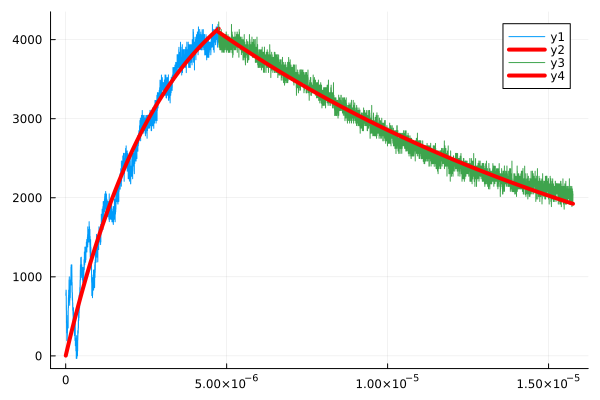

In [5]:
model2(x, p) = @. p[1] * exp(-((x - p[3]) /p[2]))
# 初期パラメータの推測
initial_params2 = [5300,17e-6,0]

# フィッティングの実行
fit_result2 = curve_fit(model2, dt3.Time, dt3.Volt*800, initial_params2)

# フィッティングされたパラメータ
fitted_params2 = fit_result2.param
println("Fitted Parameters2: ", fitted_params2)

# フィッティング結果を使用してy値を計算
yfit2 = model2(dt3.Time, fitted_params2)

plot(dt2.Time, dt2.Volt*800)
plot!(dt2.Time ,yfit1, linewidth=4, linecolor = :red)

plot!(dt3.Time, dt3.Volt*800)
plot!(dt3.Time ,yfit2, linewidth=4, linecolor = :red)


In [8]:
t1

Row,Time,Volt
,Float64,Float64
1,4.754e-6,5.28


In [9]:
maximum(dt1.Volt)*800

4224.0